<a href="https://colab.research.google.com/github/eguetti/BrazilianPrediction/blob/master/COVID_19_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
df = pd.read_csv(url)

# Brazilian prediction

In [0]:
br_df = df[df['Country/Region'] == 'Brazil'].drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).transpose()
br_df.index = pd.to_datetime(br_df.index)
br_df.columns = ['confirmed']

conf_df = br_df[br_df['confirmed'] > 0]

In [0]:
x = np.log10(br_df[br_df['confirmed'] > 0]['confirmed'].values)

In [0]:
y_pred = np.arange(x[-1], 4, step=np.diff(x).mean())[1:]

In [0]:
x_pred = pd.date_range(br_df.index.max(), periods=len(y_pred) + 1)[1:]

In [0]:
pred_df = pd.DataFrame((10 ** y_pred).astype(int), x_pred, columns=['predicted'])

Obs: This may print a warning due to a Pandas bug: https://github.com/pandas-dev/pandas/issues/32634

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

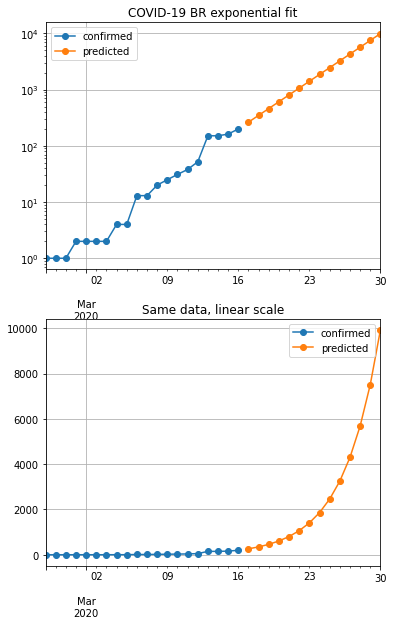

In [0]:
comb_df = pd.concat([conf_df, pred_df], sort=True)
_, ax = plt.subplots(2, 1, figsize=(6, 10))
comb_df.plot(title='COVID-19 BR exponential fit', style='o-', ax=ax[0], logy=True).grid()
comb_df.plot(title='Same data, linear scale', style='o-', ax=ax[1]).grid()
plt.show()

# Global comparison

In [0]:
font_size = 20

plt.rcParams.update({
    'legend.fontsize': 'large',
    'axes.labelsize': font_size,
    'axes.titlesize': font_size,
    'xtick.labelsize': font_size * 0.75,
    'ytick.labelsize': font_size * 0.75,
    'axes.titlepad': 25})

In [0]:
ctry_df = df.groupby('Country/Region').sum().drop(['Lat', 'Long'], axis=1)
ctry_df.columns = pd.to_datetime(ctry_df.columns)
tidy_df = ctry_df.unstack()

In [0]:
clip = 100
tidy_df = tidy_df[tidy_df >= clip].to_frame('confirmed').reset_index().rename(columns=dict(level_0='date'))
tidy_df = tidy_df[tidy_df['Country/Region'] != 'Cruise Ship']

In [0]:
tidy_df['rel_date'] = tidy_df.groupby('Country/Region')['date'].rank(method='first')

In [0]:
from datetime import date
today = date.today().strftime('%b %d')

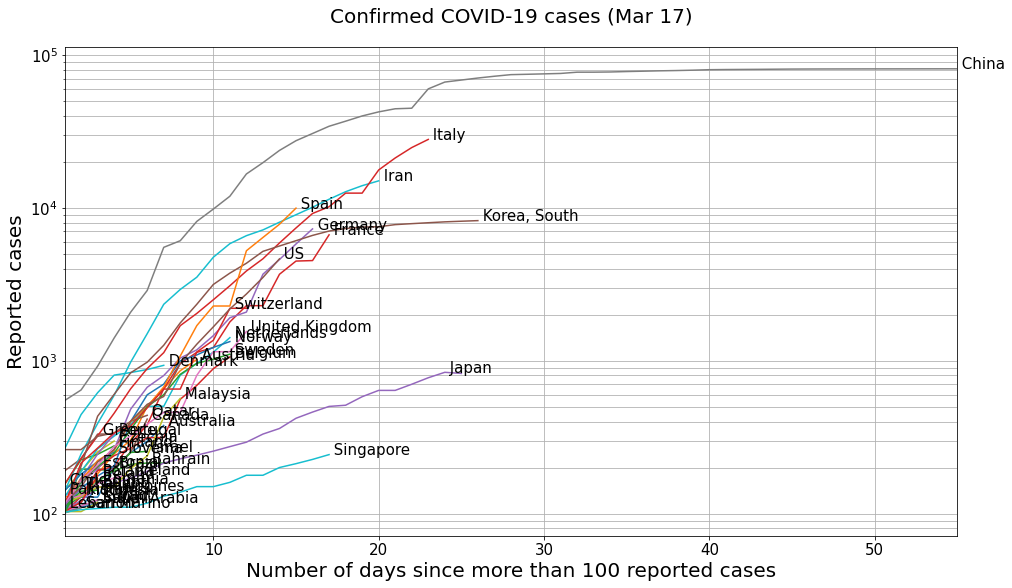

In [0]:
plot_df = tidy_df.pivot('rel_date', 'Country/Region', 'confirmed')

ax = plot_df.plot(title=f'Confirmed COVID-19 cases ({today})', logy=True, legend=False, figsize=(16, 9))
ax.set_xlabel(f'Number of days since more than {clip} reported cases')
ax.set_ylabel('Reported cases')
ax.grid(which='both')

for x, y, s in zip(plot_df.idxmax(), plot_df.max(), plot_df.columns): plt.text(x, y, f' {s}', fontsize=15)

plt.show()